# Movies Analyis Project

## Introduction




This project analyzes IMDB(Internet Movie Database) database and a Movie Budgets Dataset to identify what types of films perform best. 

The goal  is to provide data-driven insights  on `movie genres`, `production budgets` and `release timing`that will guide the launch of a new movie studio for our company.


## Objectives of the Project



1. Clean and prepare the movie datasets
2. Explore and visualize movie trends
3. Recommend profitable genres and strategies for the new studio


## Business Understanding

The company’s management wants to enter the movie production industry but lacks experience in identifying what types of films are most likely to succeed.

This analysis aims to support management by answering the following key business questions:

  1. Which movie genres are the most profitable and well-received by audiences?

  2. Which genres perform well despite lower production budgets?

  3. Does the timing of a movie’s release impact its box office performance?





## Data Understanding

The analysis uses 2 datasets (IMDB Database and Movie Budgets dataset)that provide complementary information about movies:

`The IMDB Database` contains:
 - Movie Basics Table: Contains movie titles, genres, and release dates.

 - Movie Ratings Table: Includes average audience ratings and number of votes for each movie.

`The Movie Budgets Dataset`:
 Provides production budgets and the revenue figures.

These datasets  will be merged to create a unified view of each movie’s genre, financial performance, audience reception, and release timing.

## Loading the data into dataframes

In [163]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import sqlite3

#### Movie Budgets Dataset

In [164]:
#Creating a movie budgets dataframe
movie_budgets = pd.read_csv("./original_data/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### The IMDB Dataset

In [165]:
import zipfile
import pandas as pd

# unzip the database
with zipfile.ZipFile('original_data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall()

# connect to the SQLite database
conn = sqlite3.connect('im.db')


In [166]:
#disable scientific notations for floats
pd.set_option('display.float_format','{:.2f}'.format)

In [167]:
query = """
SELECT
    mb.movie_id,
    mb.primary_title,
    mb.genres,
    mb.start_year,
    mb.runtime_minutes,
    mr.averagerating,
    mr.numvotes
FROM movie_basics AS mb
JOIN movie_ratings AS mr
    ON mb.movie_id = mr.movie_id
WHERE mb.start_year IS NOT NULL
  AND mb.genres IS NOT NULL;
"""
movie_database = pd.read_sql_query(query, conn)

#Close the connection
#conn.close()

#Display first few rows of the movies_database dataframe
movie_database.head()



,movie_id,primary_title,genres,start_year,runtime_minutes,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,175.00,7.00,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,114.00,7.20,43
2,tt0069049,The Other Side of the Wind,Drama,2018,122.00,6.90,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",2018,NaN,6.10,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,80.00,6.50,119


### Cleaning Movie Budget Dataset

In [168]:
#check movie budget structure
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 158.2+ KB


In [169]:
#check for null values
# no null values are in the movie_budget dataset and all columns have data
movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [170]:
#check if there is any duplicate
#no duplicates in movie_budget dataset
movie_budgets.duplicated().sum()

0

In [171]:
#change production_budget,domestic_gross and worldwide_gross to float
movie_budgets.head()
#this columns are to be converted in floats
movie_budgets['production_budget']=movie_budgets['production_budget'].str.replace(',','', regex=True).str.replace('$','', regex=True)
movie_budgets['domestic_gross']=movie_budgets['domestic_gross'].str.replace(',','', regex=True).str.replace('$','', regex=True)
movie_budgets['worldwide_gross']=movie_budgets['worldwide_gross'].str.replace(',','', regex=True).str.replace('$','',regex=True)



movie_budgets['production_budget']=pd.to_numeric(movie_budgets['production_budget'])  
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross']) 
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'])

movie_budgets['worldwide_gross']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [172]:
#change release_date to date
movie_budgets['release_date']=pd.to_datetime(movie_budgets['release_date'],dayfirst=True)
movie_budgets['release_date']=movie_budgets['release_date'].dt.strftime('%d-%m-%Y')

In [173]:
#rename column movie column to movie_title and drop id column
movie_budgets.rename(columns={'movie':'movie_title'},inplace=True)
movie_budgets.drop(columns='id',inplace=True)
movie_budgets.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,18-12-2009,Avatar,425000000,760507625,2776345279
1,20-05-2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,07-06-2019,Dark Phoenix,350000000,42762350,149762350
3,01-05-2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,15-12-2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Cleaning Movie Database

In [174]:
#drop null values and confirm the null values don't exist
movie_database=movie_database.dropna()
movie_database.isnull().sum()

movie_id           0
primary_title      0
genres             0
start_year         0
runtime_minutes    0
averagerating      0
numvotes           0
dtype: int64

In [175]:
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73051
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   genres           65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.3+ MB


In [176]:
#rename primary_title to movie_tile and drop the movie_id column
movie_database.rename(columns={'primary_title':'movie_title'},inplace=True)
movie_database.drop(columns='movie_id',inplace=True)

### Merging DataFrames
Combine the two dataframes into a single dataframe to enable analysis

In [177]:
# merge movie_budgets and movie_database
merged_movies=pd.merge(movie_budgets,movie_database,on=['movie_title'],how='inner')

In [178]:
merged_movies.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,genres,start_year,runtime_minutes,averagerating,numvotes
0,18-12-2009,Avatar,425000000,760507625,2776345279,Horror,2011,93.00,6.10,43
1,20-05-2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",2011,136.00,6.60,447624
2,07-06-2019,Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi",2019,113.00,6.00,24451
3,01-05-2015,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",2015,141.00,7.30,665594
4,27-04-2018,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",2018,149.00,8.50,670926


### New Feature
Generate a new feature called revenue that measures profit of each movie.This will show how each film profite based on the **production_budget** and **worldwide_gross**

In [179]:
#create profit column
merged_movies['Profit'] = merged_movies['worldwide_gross']-merged_movies['production_budget']

In [180]:
#create release month column
merged_movies['release_month'] =pd.to_datetime(merged_movies['release_date'], infer_datetime_format=True).dt.month_name()


In [181]:
#reorder the columns
merged_movies=merged_movies[['movie_title','genres','production_budget','worldwide_gross','Profit','domestic_gross','start_year',
                'release_month','runtime_minutes','averagerating','numvotes']]

In [182]:
merged_movies.head()

,movie_title,genres,production_budget,worldwide_gross,Profit,domestic_gross,start_year,release_month,runtime_minutes,averagerating,numvotes
0,Avatar,Horror,425000000,2776345279,2351345279,760507625,2011,December,93.00,6.10,43
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000,1045663875,635063875,241063875,2011,May,136.00,6.60,447624
2,Dark Phoenix,"Action,Adventure,Sci-Fi",350000000,149762350,-200237650,42762350,2019,June,113.00,6.00,24451
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000,1403013963,1072413963,459005868,2015,May,141.00,7.30,665594
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000,2048134200,1748134200,678815482,2018,April,149.00,8.50,670926


In [183]:
#save the clean data into a csv file
merged_movies.to_csv('merged_movies.csv',index=False)

# REVENUE ANALYSIS


Having generated the Revenue(ROI) received from the movies we analysed, we will now compare that across different genres to see the most profitable ones. 

This will help us answer our first business question:

Q1 - Which movie genres are the most profitable and well-received by audiences?

Going by mean revenue, Adventure and Fantasy are the highest performers overally, with Adventure,Drama,Sport and Fantasy,Romance being top pairings. Action,Adventure,Sci-Fi also performs well as a pairing with a high mean and count.

Drama, Documentary and Comedy are the most produced genres. Comedy is also a popular genre.



In [184]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [185]:
# Grouping the data by genre and calculating the mean and median revenue
genre_profit = merged_movies[['genres', 'Profit']].groupby('genres').agg(['count', 'mean', 'median'])

In [186]:
#grouping by count and revenue
genre_profit.sort_values(by=('Profit','count'),ascending=False).head(11)

Profit                          
                            count         mean       median
genres                                                     
Drama                         286  23737192.41     86058.50
Documentary                   118  31452832.32   1660912.00
Comedy                         99  37341184.83   9907746.00
Comedy,Drama                   91  25987971.85   3478400.00
Comedy,Drama,Romance           75  21882227.40   3672318.00
Drama,Romance                  74  34858984.26  10413276.50
Adventure,Animation,Comedy     73 278728221.19 159517956.00
Horror                         59  85704995.54   5139730.00
Action,Adventure,Sci-Fi        58 438519862.33 335625934.50
Comedy,Romance                 58  48757757.62  13810330.50
Action,Crime,Drama             56  26385174.55   6852344.50

In [187]:
#groupig by mean and revenue
genre_profit.sort_values(by=('Profit','mean'),ascending=False).head(11)

Profit                            
                               count          mean        median
genres                                                          
Adventure,Drama,Sport              1 1122469910.00 1122469910.00
Fantasy,Romance                    1 1122469910.00 1122469910.00
Family,Fantasy,Musical             2  843815419.00  843815419.00
Adventure,Fantasy                  3  469544026.33  695577621.00
Action,Adventure,Sci-Fi           58  438519862.33  335625934.50
Fantasy,Musical                    2  411245555.00  411245555.00
Drama,Family,Fantasy               2  350121384.00  350121384.00
Adventure,Drama,Sci-Fi             3  343550272.67  501379375.00
Biography,Documentary,History      2  339658235.50  339658235.50
Crime,Fantasy,Thriller             1  333620129.00  333620129.00
Action,Adventure,Animation        17  322257606.47  377599142.00

In [188]:
#grouping by median and revenue
genre_profit.sort_values(by=('Profit','median'),ascending=False).head(11)

Profit                            
                               count          mean        median
genres                                                          
Fantasy,Romance                    1 1122469910.00 1122469910.00
Adventure,Drama,Sport              1 1122469910.00 1122469910.00
Family,Fantasy,Musical             2  843815419.00  843815419.00
Adventure,Fantasy                  3  469544026.33  695577621.00
Adventure,Drama,Sci-Fi             3  343550272.67  501379375.00
Fantasy,Musical                    2  411245555.00  411245555.00
Action,Adventure,Animation        17  322257606.47  377599142.00
Drama,Family,Fantasy               2  350121384.00  350121384.00
Animation,Comedy,Family            6  291988257.83  341503055.00
Biography,Documentary,History      2  339658235.50  339658235.50
Action,Adventure,Sci-Fi           58  438519862.33  335625934.50

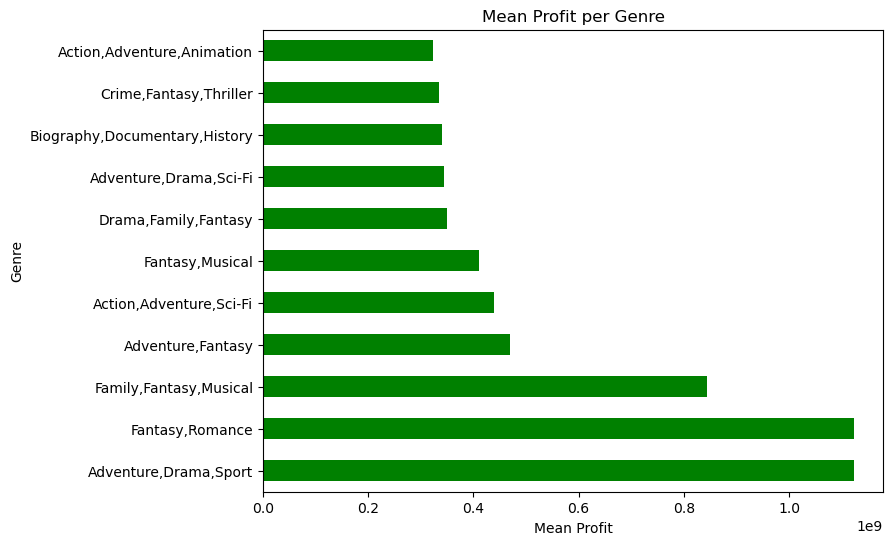

In [189]:
#plotting a graph of the mean revenue by genre
fig, ax = plt.subplots(figsize=(6, 6))
mean_genre_profit = genre_profit.sort_values(by=('Profit','mean'),ascending=False).head(11)

ax = mean_genre_profit['Profit']['mean'].plot(kind='barh', figsize=(8, 6), color='green')

ax.set_title('Mean Profit per Genre')
ax.set_xlabel('Mean Profit')
ax.set_ylabel('Genre')
plt.show();

# PRODUCTION COST ANALYSIS


We will analyse the data to check for low cost genres that still perform well overally, in case budget constraints are a factor.

This will help us answer the second business question:

Q2 - Which genres perform well despite lower production budgets?

We have used a scatter plot to establish the genres that have both a low cost of production and high ratings.

Crime,Documentary , Documentary,Drama,History and Crime,Documentary,History are examples of such.

In [190]:
#GROUPING THE DATASET BY GENRE AND PRODUCTION COST
genre_cost = merged_movies[['genres', 'production_budget','averagerating']].groupby('genres').agg('mean')


genre_cost

,production_budget,averagerating
genres,,
Action,34171428.57,5.79
"Action,Adventure",9250000.00,6.35
"Action,Adventure,Animation",115147058.82,7.43
"Action,Adventure,Biography",71000000.00,7.12
"Action,Adventure,Comedy",80233333.33,6.31
...,...,...
"Sci-Fi,Thriller",18804000.00,5.26
Sport,19000000.00,7.90
Thriller,27715813.24,5.37


In [191]:
#sorting the grouping by production budget(least costly), accessing only genres rated above 7
genre_cost[genre_cost['averagerating']>7].sort_values(by=('production_budget'),ascending = False).tail(11)

,production_budget,averagerating
genres,,
"Biography,Comedy,Documentary",9000000.00,7.70
"Biography,Family,Sport",9000000.00,7.20
"Drama,Family,Thriller",8000000.00,7.20
"Documentary,Sport,Thriller",6000000.00,7.90
"Drama,Musical",3550000.00,7.05
"Crime,Documentary,History",3000000.00,8.20
"Documentary,Drama,History",1700000.00,8.10
"Crime,Documentary",1500000.00,8.25
"Documentary,History,War",1500000.00,7.60


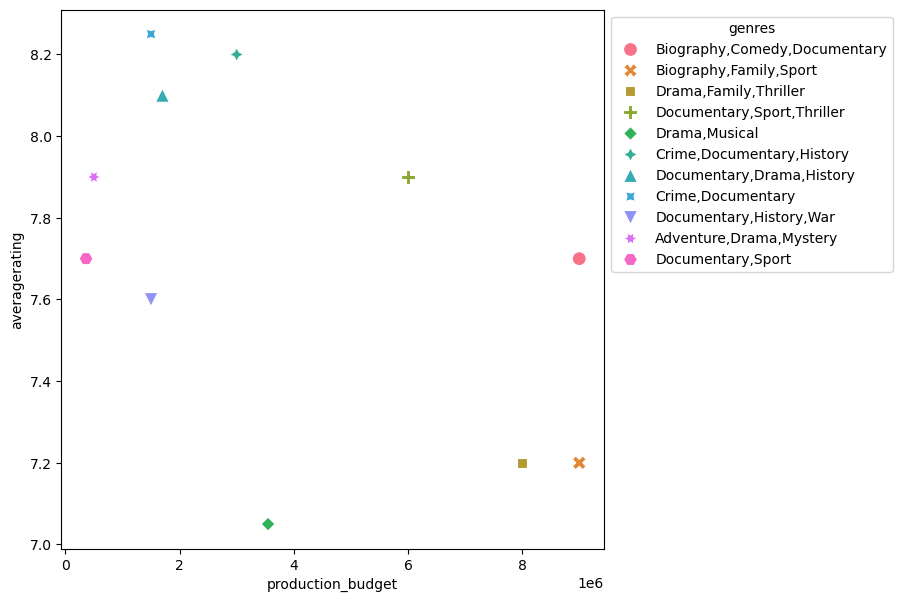

In [192]:

sum_per_genre = genre_cost[genre_cost['averagerating']>7].sort_values(by=('production_budget'),ascending = False).tail(11)

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=sum_per_genre, x='production_budget',y='averagerating', hue='genres',s=100, style='genres',ax=ax)

sns.move_legend(ax,'upper left', bbox_to_anchor=(1,1))

# RELEASE DATE IMPACT

We want to establish a possible relationship between the release date of a movie and its overall performance.

This will help us answer the third business question.

Q3 - Does the timing of a movie’s release impact its box office performance?

November, June, May and July registered the highest profit returns.


In [193]:
#grouping the data into revenue and release month
monthly_profit =  merged_movies[['release_month', 'Profit']].groupby('release_month').agg(['count', 'mean', 'median'])
monthly_profit

Profit                         
               count         mean      median
release_month                                
April            237  60800260.43  6594052.00
August           227  38520222.29  8462398.00
December         349  61658058.39  7859167.00
February         194  56789089.46 10924950.00
January          175  44327315.02 13618920.00
July             207  98462000.83 19686769.00
June             224 123256170.08 12372058.00
March            230  82239133.20  9650073.50
May              182 104599760.92 12910002.00
November         228 109668086.31 26460426.00
October          263  39359116.10  2746453.00
September        236  29379954.72  1967723.50

In [194]:
#sort by mean

monthly_profit.sort_values(by=('Profit','mean'), ascending=False)

Profit                         
               count         mean      median
release_month                                
June             224 123256170.08 12372058.00
November         228 109668086.31 26460426.00
May              182 104599760.92 12910002.00
July             207  98462000.83 19686769.00
March            230  82239133.20  9650073.50
December         349  61658058.39  7859167.00
April            237  60800260.43  6594052.00
February         194  56789089.46 10924950.00
January          175  44327315.02 13618920.00
October          263  39359116.10  2746453.00
August           227  38520222.29  8462398.00
September        236  29379954.72  1967723.50

In [195]:
#sort by median
monthly_profit.sort_values(by=('Profit','median'),ascending=False)

Profit                         
               count         mean      median
release_month                                
November         228 109668086.31 26460426.00
July             207  98462000.83 19686769.00
January          175  44327315.02 13618920.00
May              182 104599760.92 12910002.00
June             224 123256170.08 12372058.00
February         194  56789089.46 10924950.00
March            230  82239133.20  9650073.50
August           227  38520222.29  8462398.00
December         349  61658058.39  7859167.00
April            237  60800260.43  6594052.00
October          263  39359116.10  2746453.00
September        236  29379954.72  1967723.50

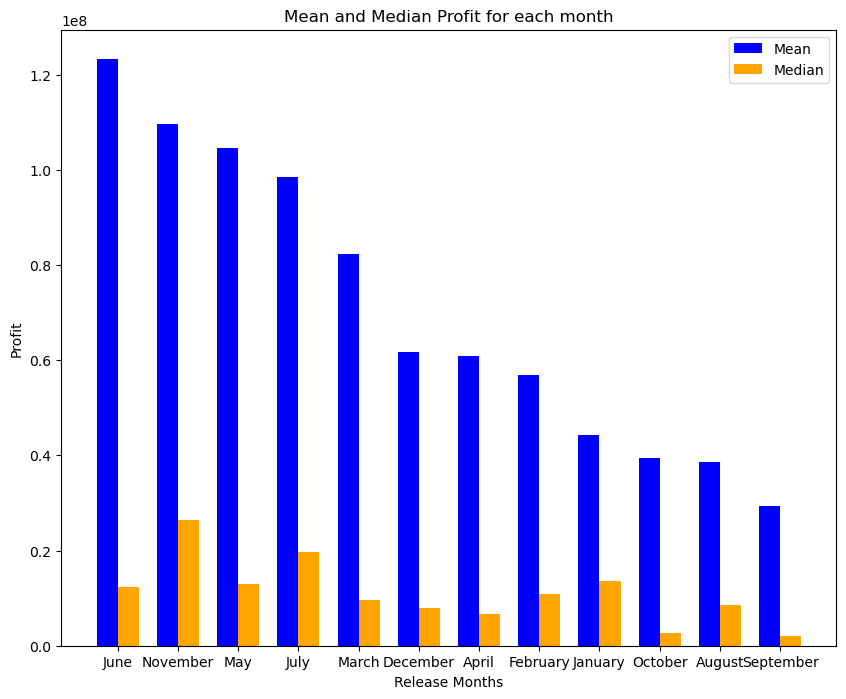

In [199]:
#set the bar width 
bar_width = 0.35

#data
mean_monthly_profit = monthly_profit.sort_values(by=('Profit','mean'), ascending=False)
# Create the plot
plt.figure(figsize=(10, 8))
index = np.arange(len(mean_monthly_profit))

# Plot the mean bars
plt.bar(index, mean_monthly_profit['Profit']['mean'], bar_width, label='Mean', color='blue')

# Plot the median bars
plt.bar(index + bar_width,mean_monthly_profit['Profit']['median'], bar_width, label='Median', color='orange')

# Set the title
plt.title('Mean and Median Profit for each month')
# Set the x-axis labels
plt.xlabel('Release Months')
plt.xticks(index + bar_width / 2, mean_monthly_profit.index)

# Set the y-axis label
plt.ylabel('Profit')

# Add a legend
plt.legend()

# Show the plot
plt.show()